In [23]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

In [24]:
tf.random.set_seed(110123184)

In [25]:
(x_train, _), (_, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_train = np.expand_dims(x_train, axis=-1)

In [35]:
latent_dim = 100
epochs = 100000
batch_size = 128

In [36]:
# Build the generator model
generator = tf.keras.Sequential([
    layers.Dense(256, input_dim=latent_dim),
    layers.LeakyReLU(alpha=0.2),
    layers.BatchNormalization(momentum=0.8),
    layers.Dense(512),
    layers.LeakyReLU(alpha=0.2),
    layers.BatchNormalization(momentum=0.8),
    layers.Dense(784, activation='sigmoid'),
    layers.Reshape((28, 28, 1))
])


In [37]:
# Build the discriminator model
discriminator = tf.keras.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(512),
    layers.LeakyReLU(alpha=0.2),
    layers.Dense(256),
    layers.LeakyReLU(alpha=0.2),
    layers.Dense(1, activation='sigmoid')
])


In [38]:

# Compile the discriminator
discriminator.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5),
)


In [39]:

# The generator takes noise as input and generates images
z = layers.Input(shape=(latent_dim,))
img = generator(z)


In [40]:

# For the combined model, only train the generator
discriminator.trainable = False


In [41]:

# The discriminator takes generated images as input and determines validity
validity = discriminator(img)


In [42]:

# The combined model (stacked generator and discriminator)
combined = tf.keras.Model(z, validity)
combined.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5),
)


4/4 [==============================] - 0s 3ms/step
Epoch 0/100000 | D loss: 0.8370888829231262 | G loss: 0.9855725765228271
1/1 [==============================] - 0s 128ms/step


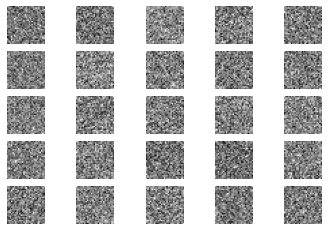

4/4 [==============================] - 0s 3ms/step
Epoch 100/100000 | D loss: 0.0036161625757813454 | G loss: 13.003435134887695
1/1 [==============================] - 0s 21ms/step


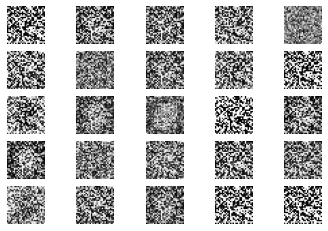

4/4 [==============================] - 0s 3ms/step
Epoch 200/100000 | D loss: 0.041853923350572586 | G loss: 29.36257553100586
1/1 [==============================] - 0s 21ms/step


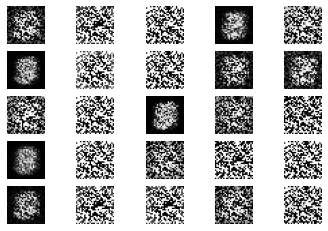

4/4 [==============================] - 0s 3ms/step
Epoch 300/100000 | D loss: 0.040674762800335884 | G loss: 38.885162353515625
1/1 [==============================] - 0s 20ms/step


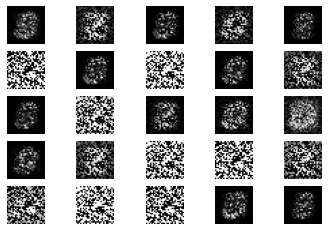

4/4 [==============================] - 0s 3ms/step
Epoch 400/100000 | D loss: 0.028702829033136368 | G loss: 37.33306121826172
1/1 [==============================] - 0s 20ms/step


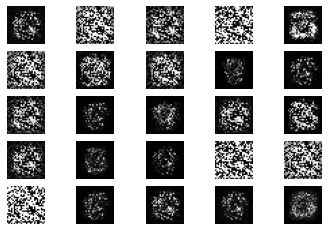

4/4 [==============================] - 0s 3ms/step
Epoch 500/100000 | D loss: 0.022632588632404804 | G loss: 7.200998306274414
1/1 [==============================] - 0s 20ms/step


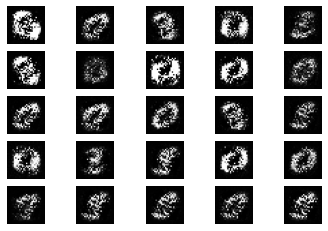

4/4 [==============================] - 0s 3ms/step
Epoch 600/100000 | D loss: 0.0744206327944994 | G loss: 5.031347274780273
1/1 [==============================] - 0s 22ms/step


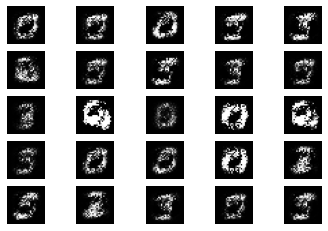

4/4 [==============================] - 0s 4ms/step
Epoch 700/100000 | D loss: 0.10476654022932053 | G loss: 4.907354831695557
1/1 [==============================] - 0s 38ms/step


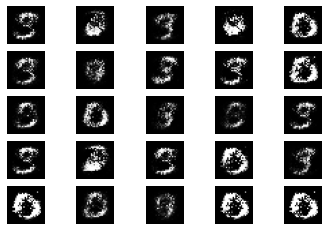

4/4 [==============================] - 0s 3ms/step
Epoch 800/100000 | D loss: 0.05416611395776272 | G loss: 4.538799285888672
1/1 [==============================] - 0s 21ms/step


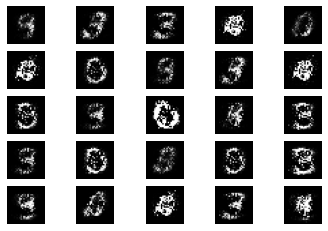

4/4 [==============================] - 0s 3ms/step
Epoch 900/100000 | D loss: 0.06022457405924797 | G loss: 5.556941986083984
1/1 [==============================] - 0s 25ms/step


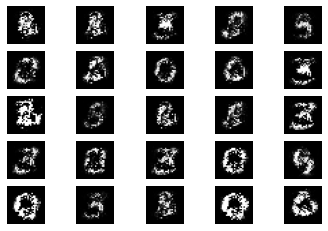

4/4 [==============================] - 0s 3ms/step
Epoch 1000/100000 | D loss: 0.028435716405510902 | G loss: 4.6478047370910645
1/1 [==============================] - 0s 20ms/step


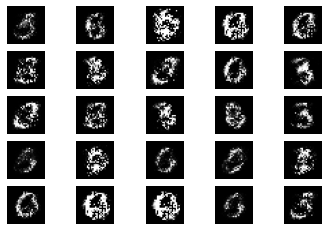

4/4 [==============================] - 0s 4ms/step
Epoch 1100/100000 | D loss: 0.6344045251607895 | G loss: 12.111539840698242
1/1 [==============================] - 0s 22ms/step


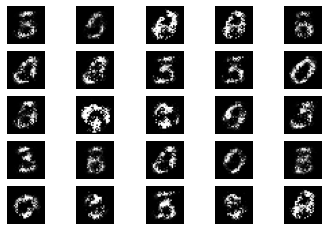

4/4 [==============================] - 0s 3ms/step
Epoch 1200/100000 | D loss: 0.08990133181214333 | G loss: 5.779080390930176
1/1 [==============================] - 0s 21ms/step


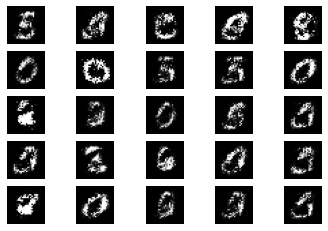

4/4 [==============================] - 0s 3ms/step
Epoch 1300/100000 | D loss: 0.16789298504590988 | G loss: 4.542954921722412
1/1 [==============================] - 0s 21ms/step


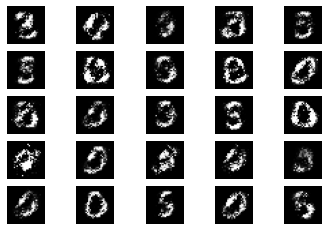

4/4 [==============================] - 0s 3ms/step
Epoch 1400/100000 | D loss: 0.1777375228703022 | G loss: 4.264509201049805
1/1 [==============================] - 0s 22ms/step


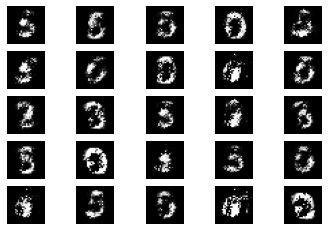

4/4 [==============================] - 0s 3ms/step
Epoch 1500/100000 | D loss: 0.11971021816134453 | G loss: 4.856210708618164
1/1 [==============================] - 0s 23ms/step


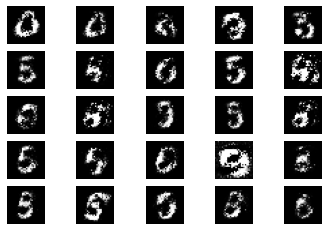

4/4 [==============================] - 0s 3ms/step
Epoch 1600/100000 | D loss: 0.1661970168352127 | G loss: 4.93377685546875
1/1 [==============================] - 0s 22ms/step


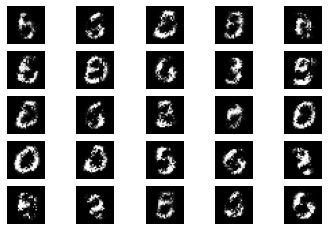

4/4 [==============================] - 0s 3ms/step
Epoch 1700/100000 | D loss: 0.14765732362866402 | G loss: 4.0948615074157715
1/1 [==============================] - 0s 20ms/step


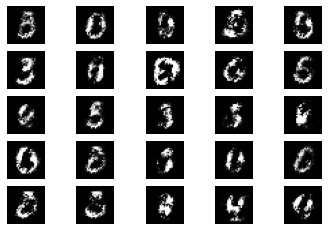

4/4 [==============================] - 0s 3ms/step
Epoch 1800/100000 | D loss: 0.17031734250485897 | G loss: 4.408163070678711
1/1 [==============================] - 0s 24ms/step


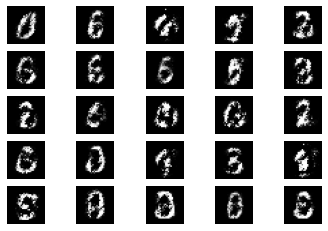

4/4 [==============================] - 0s 3ms/step
Epoch 1900/100000 | D loss: 0.26353317499160767 | G loss: 3.5300984382629395
1/1 [==============================] - 0s 21ms/step


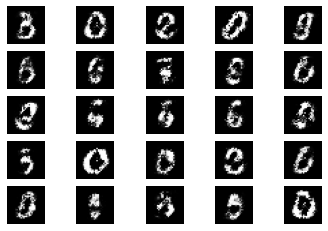

4/4 [==============================] - 0s 3ms/step
Epoch 2000/100000 | D loss: 0.20201851427555084 | G loss: 3.6312742233276367
1/1 [==============================] - 0s 22ms/step


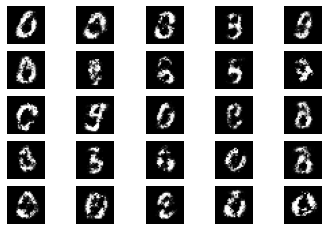

4/4 [==============================] - 0s 3ms/step
Epoch 2100/100000 | D loss: 0.29198528826236725 | G loss: 3.545957088470459
1/1 [==============================] - 0s 21ms/step


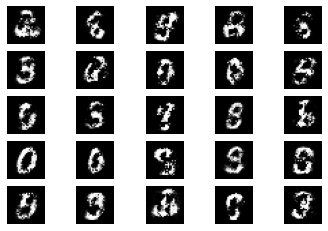

4/4 [==============================] - 0s 4ms/step
Epoch 2200/100000 | D loss: 0.28287267684936523 | G loss: 3.6893765926361084
1/1 [==============================] - 0s 21ms/step


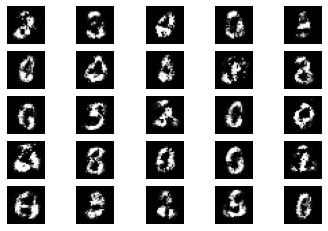

4/4 [==============================] - 0s 3ms/step
Epoch 2300/100000 | D loss: 0.2906976044178009 | G loss: 3.9071593284606934
1/1 [==============================] - 0s 21ms/step


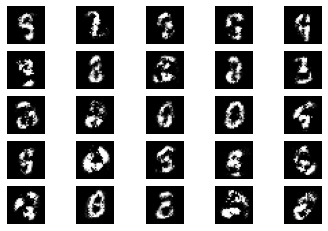

4/4 [==============================] - 0s 3ms/step
Epoch 2400/100000 | D loss: 0.36345215141773224 | G loss: 3.2492260932922363
1/1 [==============================] - 0s 22ms/step


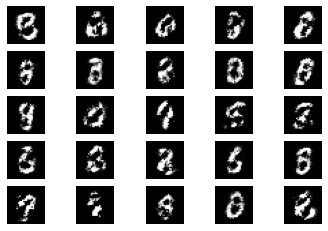

4/4 [==============================] - 0s 4ms/step
Epoch 2500/100000 | D loss: 0.3294757604598999 | G loss: 3.4388914108276367
1/1 [==============================] - 0s 23ms/step


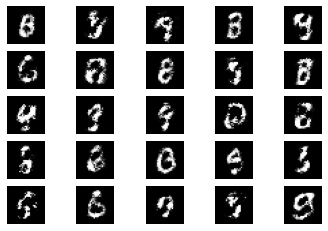

4/4 [==============================] - 0s 4ms/step
Epoch 2600/100000 | D loss: 0.3940211683511734 | G loss: 3.2947616577148438
1/1 [==============================] - 0s 20ms/step


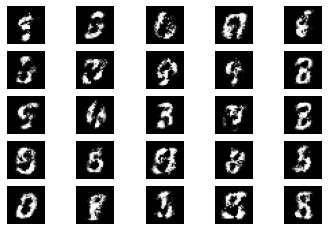

4/4 [==============================] - 0s 3ms/step
Epoch 2700/100000 | D loss: 0.32431864738464355 | G loss: 3.2718963623046875
1/1 [==============================] - 0s 21ms/step


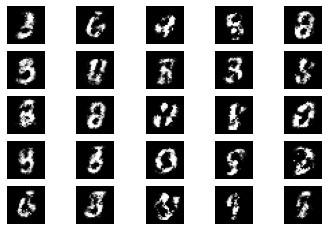

4/4 [==============================] - 0s 4ms/step
Epoch 2800/100000 | D loss: 0.35269372165203094 | G loss: 2.9454598426818848
1/1 [==============================] - 0s 22ms/step


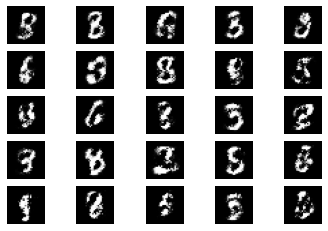

4/4 [==============================] - 0s 3ms/step
Epoch 2900/100000 | D loss: 0.319785475730896 | G loss: 2.8829305171966553
1/1 [==============================] - 0s 20ms/step


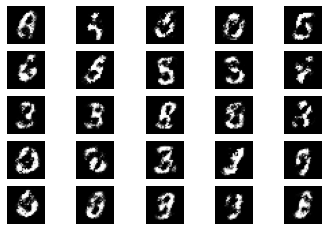

4/4 [==============================] - 0s 4ms/step
Epoch 3000/100000 | D loss: 0.32717742025852203 | G loss: 2.7995095252990723
1/1 [==============================] - 0s 22ms/step


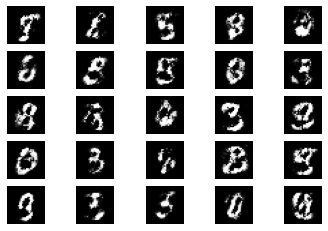

4/4 [==============================] - 0s 4ms/step
Epoch 3100/100000 | D loss: 0.36381836235523224 | G loss: 2.5569090843200684
1/1 [==============================] - 0s 22ms/step


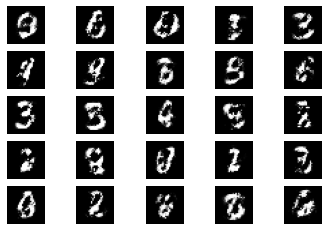

4/4 [==============================] - 0s 3ms/step
Epoch 3200/100000 | D loss: 0.3197837918996811 | G loss: 2.586771011352539
1/1 [==============================] - 0s 22ms/step


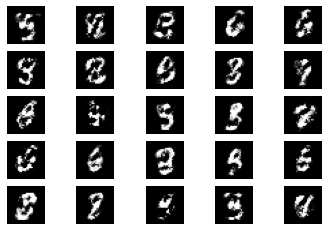

4/4 [==============================] - 0s 4ms/step
Epoch 3300/100000 | D loss: 0.3539268672466278 | G loss: 2.8452489376068115
1/1 [==============================] - 0s 22ms/step


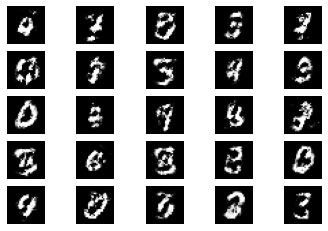

4/4 [==============================] - 0s 4ms/step
Epoch 3400/100000 | D loss: 0.3067052364349365 | G loss: 2.7388577461242676
1/1 [==============================] - 0s 22ms/step


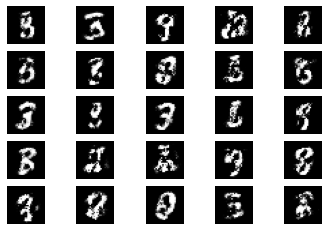

4/4 [==============================] - 0s 4ms/step
Epoch 3500/100000 | D loss: 0.3999013602733612 | G loss: 2.693201780319214
1/1 [==============================] - 0s 28ms/step


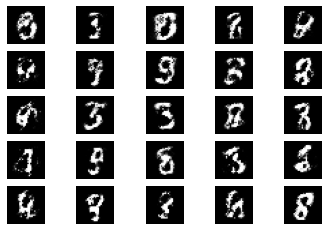

4/4 [==============================] - 0s 4ms/step
Epoch 3600/100000 | D loss: 0.3579830229282379 | G loss: 2.6601028442382812
1/1 [==============================] - 0s 23ms/step


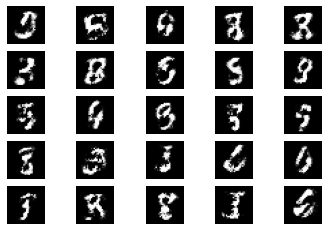

4/4 [==============================] - 0s 4ms/step
Epoch 3700/100000 | D loss: 0.40619906783103943 | G loss: 2.724306583404541
1/1 [==============================] - 0s 23ms/step


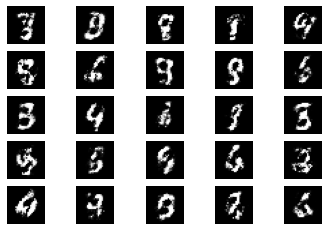

4/4 [==============================] - 0s 4ms/step
Epoch 3800/100000 | D loss: 0.3199174255132675 | G loss: 2.719036340713501
1/1 [==============================] - 0s 23ms/step


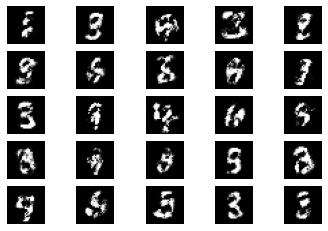

4/4 [==============================] - 0s 4ms/step
Epoch 3900/100000 | D loss: 0.31771428883075714 | G loss: 2.5161473751068115
1/1 [==============================] - 0s 22ms/step


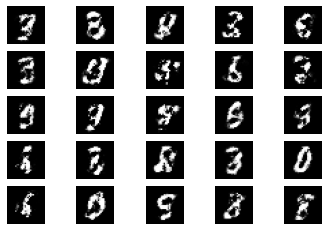

4/4 [==============================] - 0s 4ms/step
Epoch 4000/100000 | D loss: 0.4104108214378357 | G loss: 2.612551689147949
1/1 [==============================] - 0s 23ms/step


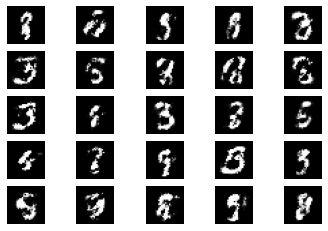

4/4 [==============================] - 0s 5ms/step
Epoch 4100/100000 | D loss: 0.4312938153743744 | G loss: 2.524195909500122
1/1 [==============================] - 0s 21ms/step


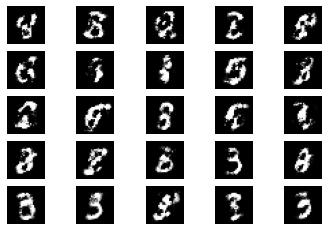

4/4 [==============================] - 0s 5ms/step
Epoch 4200/100000 | D loss: 0.29297053813934326 | G loss: 2.7480201721191406
1/1 [==============================] - 0s 23ms/step


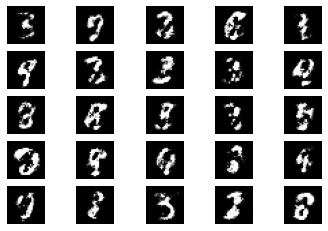

4/4 [==============================] - 0s 4ms/step
Epoch 4300/100000 | D loss: 0.3625819683074951 | G loss: 2.503953456878662
1/1 [==============================] - 0s 21ms/step


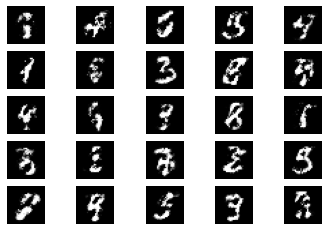

4/4 [==============================] - 0s 5ms/step
Epoch 4400/100000 | D loss: 0.34467242658138275 | G loss: 2.493159770965576
1/1 [==============================] - 0s 22ms/step


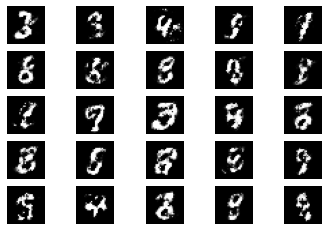

4/4 [==============================] - 0s 5ms/step
Epoch 4500/100000 | D loss: 0.390876442193985 | G loss: 2.3299241065979004
1/1 [==============================] - 0s 23ms/step


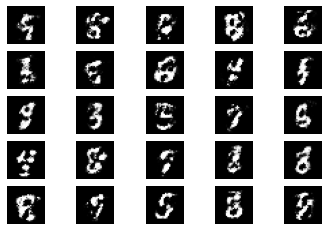

4/4 [==============================] - 0s 4ms/step
Epoch 4600/100000 | D loss: 0.4136117994785309 | G loss: 2.6337890625
1/1 [==============================] - 0s 22ms/step


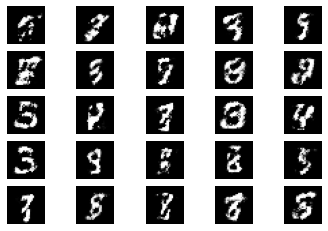

4/4 [==============================] - 0s 6ms/step
Epoch 4700/100000 | D loss: 0.3477165997028351 | G loss: 2.4433140754699707
1/1 [==============================] - 0s 25ms/step


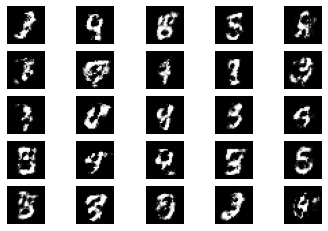

4/4 [==============================] - 0s 6ms/step
Epoch 4800/100000 | D loss: 0.40603187680244446 | G loss: 2.3409652709960938
1/1 [==============================] - 0s 24ms/step


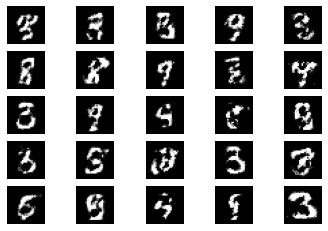

4/4 [==============================] - 0s 8ms/step
Epoch 4900/100000 | D loss: 0.3060668557882309 | G loss: 2.458070993423462
1/1 [==============================] - 0s 31ms/step


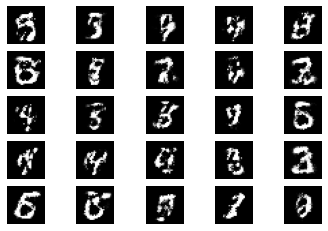

4/4 [==============================] - 0s 5ms/step
Epoch 5000/100000 | D loss: 0.38580694794654846 | G loss: 2.61336350440979
1/1 [==============================] - 0s 24ms/step


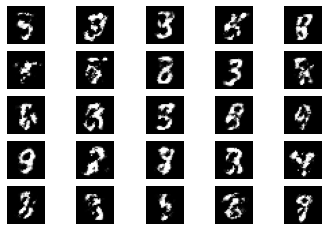

4/4 [==============================] - 0s 5ms/step
Epoch 5100/100000 | D loss: 0.33453890681266785 | G loss: 2.4195847511291504
1/1 [==============================] - 0s 23ms/step


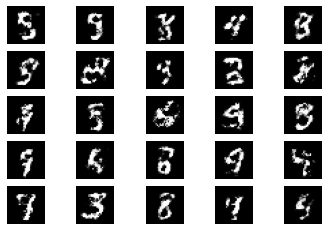

4/4 [==============================] - 0s 5ms/step
Epoch 5200/100000 | D loss: 0.33025115728378296 | G loss: 2.4120373725891113
1/1 [==============================] - 0s 23ms/step


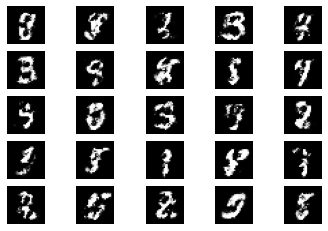

4/4 [==============================] - 0s 6ms/step
Epoch 5300/100000 | D loss: 0.40736447274684906 | G loss: 2.20859432220459
1/1 [==============================] - 0s 24ms/step


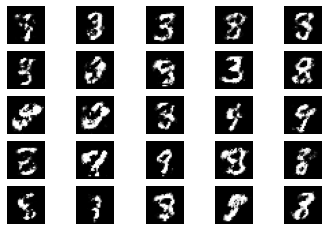

4/4 [==============================] - 0s 6ms/step
Epoch 5400/100000 | D loss: 0.4543292969465256 | G loss: 2.377777099609375
1/1 [==============================] - 0s 27ms/step


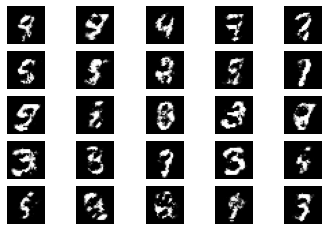

4/4 [==============================] - 0s 6ms/step
Epoch 5500/100000 | D loss: 0.45786580443382263 | G loss: 2.363748550415039
1/1 [==============================] - 0s 24ms/step


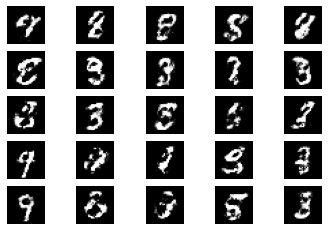

4/4 [==============================] - 0s 6ms/step
Epoch 5600/100000 | D loss: 0.34808267652988434 | G loss: 2.258378267288208
1/1 [==============================] - 0s 23ms/step


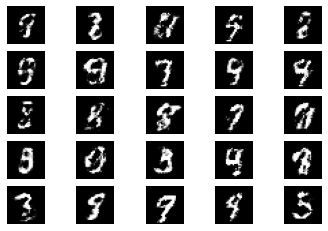

4/4 [==============================] - 0s 6ms/step
Epoch 5700/100000 | D loss: 0.3886500597000122 | G loss: 2.306692600250244
1/1 [==============================] - 0s 29ms/step


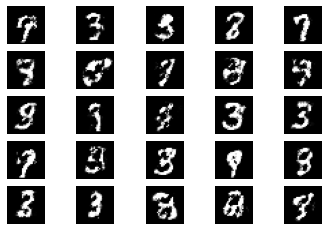

4/4 [==============================] - 0s 6ms/step
Epoch 5800/100000 | D loss: 0.3400559425354004 | G loss: 2.2124767303466797
1/1 [==============================] - 0s 25ms/step


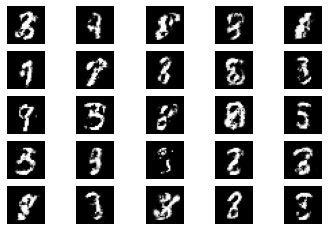

4/4 [==============================] - 0s 6ms/step
Epoch 5900/100000 | D loss: 0.3693518787622452 | G loss: 2.1082205772399902
1/1 [==============================] - 0s 24ms/step


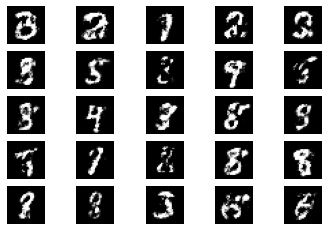

4/4 [==============================] - 0s 6ms/step
Epoch 6000/100000 | D loss: 0.4253390431404114 | G loss: 2.1732211112976074
1/1 [==============================] - 0s 24ms/step


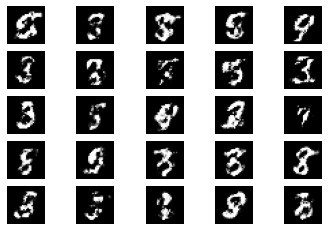

4/4 [==============================] - 0s 6ms/step
Epoch 6100/100000 | D loss: 0.40642285346984863 | G loss: 2.018876075744629
1/1 [==============================] - 0s 25ms/step


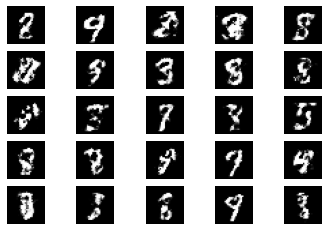

4/4 [==============================] - 0s 6ms/step
Epoch 6200/100000 | D loss: 0.3755902349948883 | G loss: 2.184004306793213
1/1 [==============================] - 0s 25ms/step


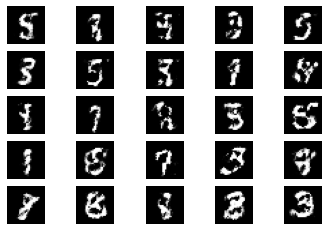

4/4 [==============================] - 0s 6ms/step
Epoch 6300/100000 | D loss: 0.3647323548793793 | G loss: 2.150740623474121
1/1 [==============================] - 0s 24ms/step


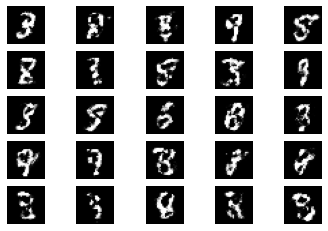

4/4 [==============================] - 0s 7ms/step
Epoch 6400/100000 | D loss: 0.36666660010814667 | G loss: 2.346312999725342
1/1 [==============================] - 0s 24ms/step


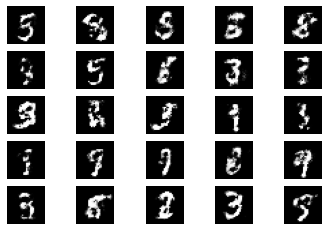

4/4 [==============================] - 0s 15ms/step


In [ ]:

# Training loop
for epoch in range(epochs):
   
    #  Train Discriminator
    # Select a random batch of images
    idx = np.random.randint(0, x_train.shape[0], batch_size)
    real_images = x_train[idx]

    # Generate a batch of new images
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    generated_images = generator.predict(noise)

    # Train the discriminator
    d_loss_real = discriminator.train_on_batch(real_images, np.ones((batch_size, 1)))
    d_loss_fake = discriminator.train_on_batch(generated_images, np.zeros((batch_size, 1)))
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    #  Train Generator
    
    noise = np.random.normal(0, 1, (batch_size, latent_dim))

    # Train the generator (to have the discriminator label samples as valid)
    g_loss = combined.train_on_batch(noise, np.ones((batch_size, 1)))

    # Plot the progress
    if epoch % 100 == 0:
        print(f"Epoch {epoch}/{epochs} | D loss: {d_loss} | G loss: {g_loss}")

        # Generate and save some images to visualize progress
        r, c = 5, 5
        noise = np.random.normal(0, 1, (r * c, latent_dim))
        gen_imgs = generator.predict(noise)
        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
                axs[i, j].axis('off')
                cnt += 1
        plt.show()